In [1]:
# Imporating all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('/content/fifa_players.csv')

# Display the shape of the dataset
print(data.shape)


(17954, 51)


In [3]:
# Display the first few rows of the dataset
print(data.head())

           name                       full_name birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini  6/24/1987   31     170.18   
1    C. Eriksen    Christian  Dannemann Eriksen  2/14/1992   27     154.94   
2      P. Pogba                      Paul Pogba  3/15/1993   25     190.50   
3    L. Insigne                 Lorenzo Insigne   6/4/1991   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly  6/20/1991   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential  ...  \
0        72.1   CF,RW,ST   Argentina              94         94  ...   
1        76.2  CAM,RM,CM     Denmark              88         89  ...   
2        83.9     CM,CAM      France              88         91  ...   
3        59.0      LW,ST       Italy              88         88  ...   
4        88.9         CB     Senegal              88         91  ...   

   long_shots  aggression interceptions  positioning  vision  penalties  \
0          94          

In [4]:
# Get a summary of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [5]:
# Display information about missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_pa

In [6]:


# Define columns with missing values
columns_with_missing = ['value_euro', 'wage_euro', 'release_clause_euro']

# Fill missing values with appropriate methods
data['value_euro'].fillna(data['value_euro'].median(), inplace=True)
data['wage_euro'].fillna(data['wage_euro'].median(), inplace=True)
data['release_clause_euro'].fillna(data['release_clause_euro'].median(), inplace=True)

# Drop columns with a high number of missing values
columns_to_drop = ['national_team', 'national_rating', 'national_team_position', 'national_jersey_number']
data.drop(columns=columns_to_drop, inplace=True)

# Check for any remaining missing values
print(data.isnull().sum())

# Save the cleaned dataset to a new DataFrame
cleaned_fifa_data = data.copy()

# You can perform further operations on the cleaned DataFrame if needed

# Display the first few rows of the cleaned DataFrame
print(cleaned_fifa_data.head())


name                             0
full_name                        0
birth_date                       0
age                              0
height_cm                        0
weight_kgs                       0
positions                        0
nationality                      0
overall_rating                   0
potential                        0
value_euro                       0
wage_euro                        0
preferred_foot                   0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
body_type                        0
release_clause_euro              0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
long_passing                     0
ball_control                     0
acceleration        

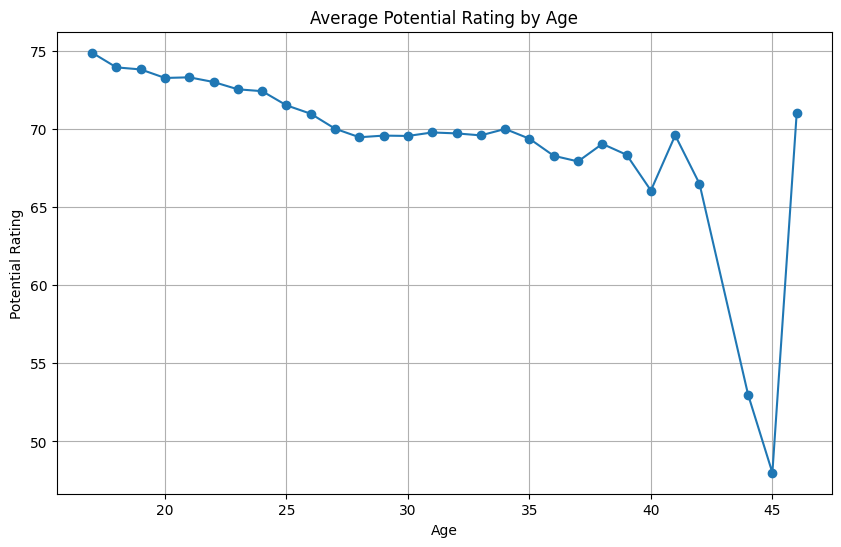

In [14]:

# Filter relevant columns
age_potential_data = cleaned_fifa_data[['age', 'potential']]

# Group by age and calculate mean potential for each age
age_potential_mean = age_potential_data.groupby('age').mean().reset_index()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(age_potential_mean['age'], age_potential_mean['potential'], marker='o', linestyle='-')
plt.title('Average Potential Rating by Age')
plt.xlabel('Age')
plt.ylabel('Potential Rating')
plt.grid(True)
plt.show()


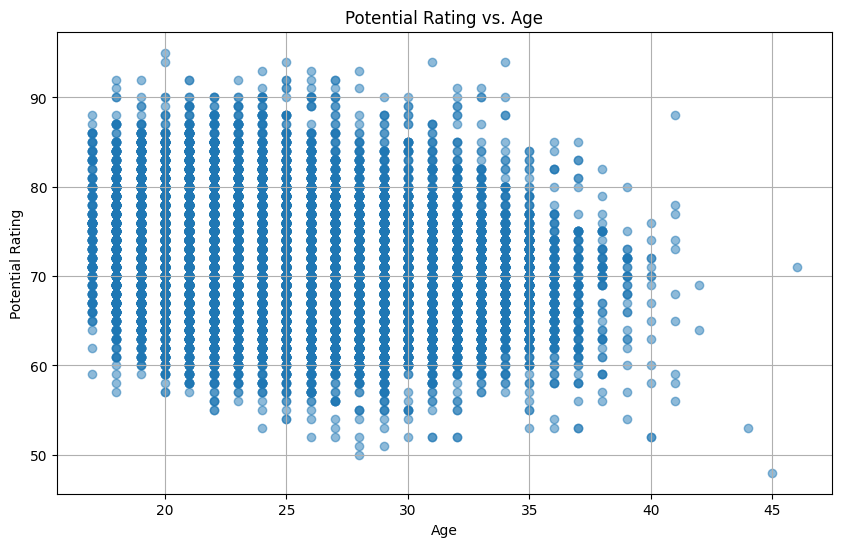

In [9]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age_potential_data['age'], age_potential_data['potential'], alpha=0.5)
plt.title('Potential Rating vs. Age')
plt.xlabel('Age')
plt.ylabel('Potential Rating')
plt.grid(True)
plt.show()


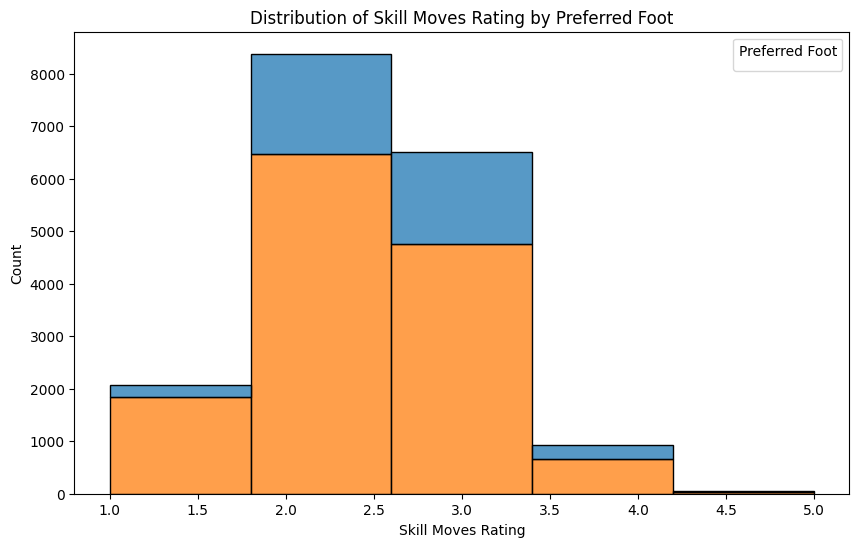

In [15]:

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_fifa_data, x='skill_moves(1-5)', hue='preferred_foot', multiple='stack', bins=5)
plt.title('Distribution of Skill Moves Rating by Preferred Foot')
plt.xlabel('Skill Moves Rating')
plt.ylabel('Count')
plt.legend(title='Preferred Foot')
plt.grid(False)
plt.show()


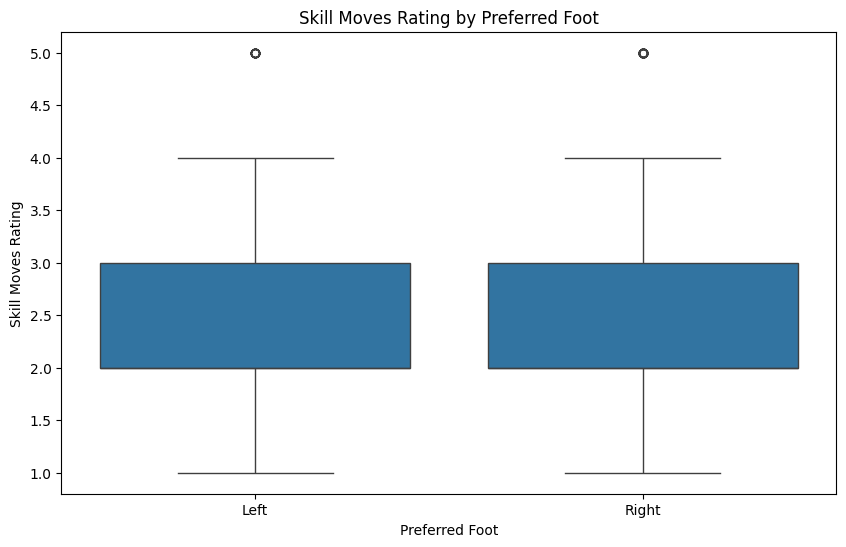

In [16]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_fifa_data, x='preferred_foot', y='skill_moves(1-5)')
plt.title('Skill Moves Rating by Preferred Foot')
plt.xlabel('Preferred Foot')
plt.ylabel('Skill Moves Rating')
plt.grid(False)
plt.show()

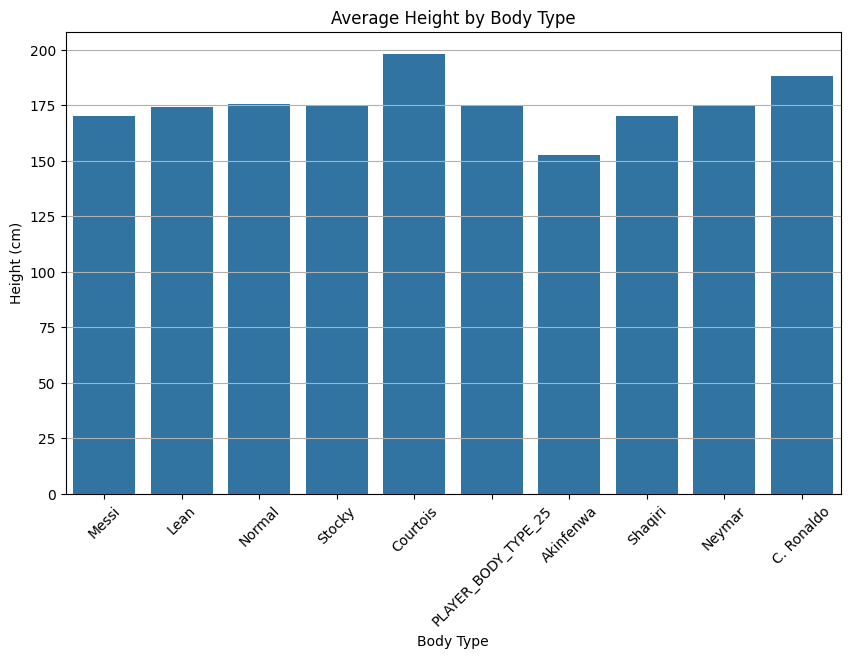

In [17]:
# Bar plot for height by body type
plt.figure(figsize=(10, 6))
sns.barplot(data=cleaned_fifa_data, x='body_type', y='height_cm', ci=None)
plt.title('Average Height by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Height (cm)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

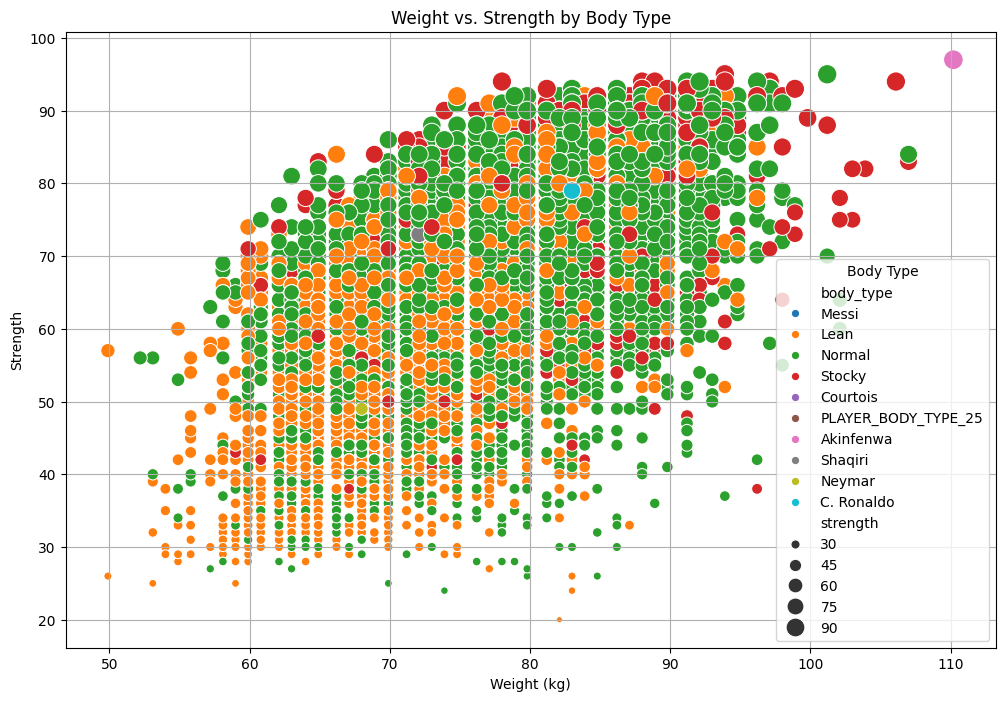

In [18]:

# Bubble plot for weight and strength by body type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cleaned_fifa_data, x='weight_kgs', y='strength', hue='body_type', size='strength', sizes=(20, 200))
plt.title('Weight vs. Strength by Body Type')
plt.xlabel('Weight (kg)')
plt.ylabel('Strength')
plt.grid(True)
plt.legend(title='Body Type')
plt.show()